In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
merged_df = pd.read_csv("data/data_merged.csv", low_memory=False)
raw_df = pd.read_csv("data/data_raw.csv", low_memory=False, header=[0, 1])

In [4]:
interested_years = merged_df.loc[merged_df["questionnaire_login_year_group_name"].isin(["Year 9", "Year 10", "Year 11", "Year 12"])]

In [5]:
interested_years

,Unnamed: 0,hashed_id,school_classification_list,school_local_authority_filter_classification,questionnaire_login_year_group_name,"As you are filling in this survey today, which of these would you use to describe your gender?",How would you describe your sexual identity?,Which of these describes you?,"Do you have, or do you consider yourself to have, a disability?",Where do you live most of the time?,...,After lockdown..._Have you felt supported by your school?,"After lockdown..._After lockdown, if you needed it, have you been able to get support from school/college to help you with your emotional and mental health?","After lockdown..._During lockdown, my school was good at helping me to keep myself safe","After lockdown..._During lockdown, my school was good at staying in touch with me","After lockdown..._During lockdown, my school was good at helping me with my school work","After lockdown..._After lockdown, are you enjoying being back at school?","After lockdown..._After lockdown, are you getting on well with your school work?","After lockdown..._After lockdown, are you getting on well with your teachers?","After lockdown..._After lockdown, have you felt helped by your teachers?","After lockdown..._After lockdown, if you needed it, have you been able to get help from school with your feelings?"
3,3,'610bdf',Secondary,National,Year 9,Girl / Female,Heterosexual,White,No,I live with my parent(s)/carer(s),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,'08514',Secondary,National,Year 9,Boy / Male,Heterosexual,White,Yes,I live with my parent(s)/carer(s),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,'f56ed',Secondary,National,Year 9,Boy / Male,I would prefer not to say,I prefer not to say,No,I live with my parent(s)/carer(s),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,'98e99',Secondary,National,Year 9,Boy / Male,Heterosexual,Asian,No,I live with someone else,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,'17d0',Secondary,National,Year 9,Boy / Male,Heterosexual,White,No,"I live at both of my parents' houses, some of ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35681,35681,'a381e',"Through School, Secondary",Leeds,Year 9,Girl / Female,Heterosexual,Asian,No,I live with my parent(s)/carer(s),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35682,35682,'60b2d',"Through School, Secondary",Leeds,Year 9,Girl / Female,Heterosexual,White,No,"I live at both of my parents' houses, some of ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35685,35685,'09d0',"Through School, Secondary",Leeds,Year 9,Boy / Male,Heterosexual,Mixed,Yes,I live with my parent(s)/carer(s),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35688,35688,'cb51b',"Through School, Secondary",Leeds,Year 9,Girl / Female,Heterosexual,Mixed,No,I live with other family members,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
interested_years.isna().sum(axis=1).mean()

np.float64(618.7385733645435)

In [7]:
interested_years.columns[:20]

Index(['Unnamed: 0', 'hashed_id', 'school_classification_list',
       'school_local_authority_filter_classification',
       'questionnaire_login_year_group_name',
       'As you are filling in this survey today, which of these would you use to describe your gender?',
       'How would you describe your sexual identity?',
       'Which of these describes you?',
       'Do you have, or do you consider yourself to have, a disability?',
       'Where do you live most of the time?',
       'Do you have a free school meal?',
       'Which of these describes you as a student?', 'Are you a...',
       'In a normal week, how often do you have breakfast (this means not just a snack or a drink)?',
       'On a normal school/college day, where do you eat breakfast?',
       'In a normal week, how often do you have the following (this means not just a snack or a drink)?_Evening meal/Dinner',
       'On a normal day, how many portions of the following do you have?_Fruit & vegetables (can include u

In [8]:
# find columns that are relevant to overall wellbeing

terms = [
    "quality",
    "stress",
    "fitness",
    "confident",
    "happy",
]

def terms_in(column):
    return any(list(map(lambda term: term in column.lower(), terms)))

matching_columns = [column for column in interested_years.columns if terms_in(column)]

In [9]:
matching_columns

['What after-school club(s) would you like school to offer?_I am happy with the sports club(s) my school offers',
 'What active/sports club(s) at break/lunch time would you like school/college to offer?_I am happy with the active/sports club(s) my school/college offers',
 'How often do you feel the following?_Happy',
 'How often do you feel the following?_Confident',
 'How well do you think you cope with feeling the following?_Stressed or anxious',
 'How well do you think you cope with feeling the following?_How happy do you feel about the number of good friends you have?',
 'If you have been bullied in or around school/college in the last 12 months, do you think it was because of any of the following?_Are you happy?',
 "During lockdown'_During lockdown, have you been happy at home?"]

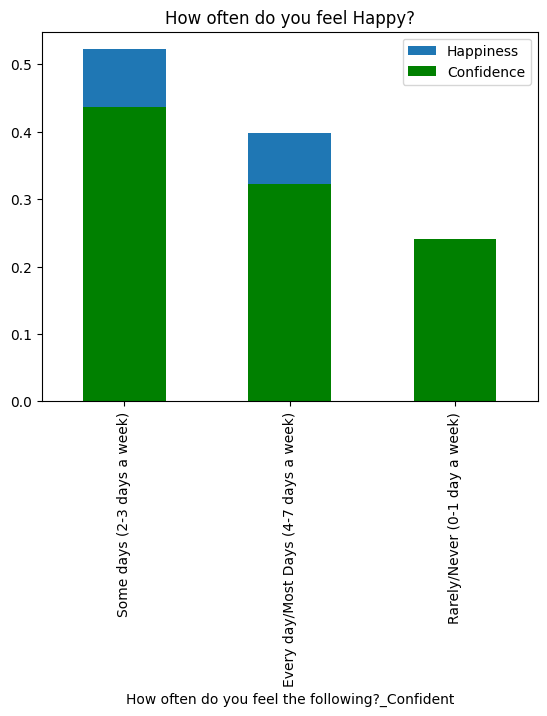

In [24]:
_, ax = plt.subplots()

interested_years["How often do you feel the following?_Happy"].value_counts(normalize=True).plot.bar(ax=ax, label="Happiness")
interested_years["How often do you feel the following?_Confident"].value_counts(normalize=True).plot.bar( ax=ax, color="green", label="Confidence")
plt.legend()
ax.set_title("How often do you feel Happy?")
plt.show()


<Axes: xlabel='How often do you feel the following?_Confident'>

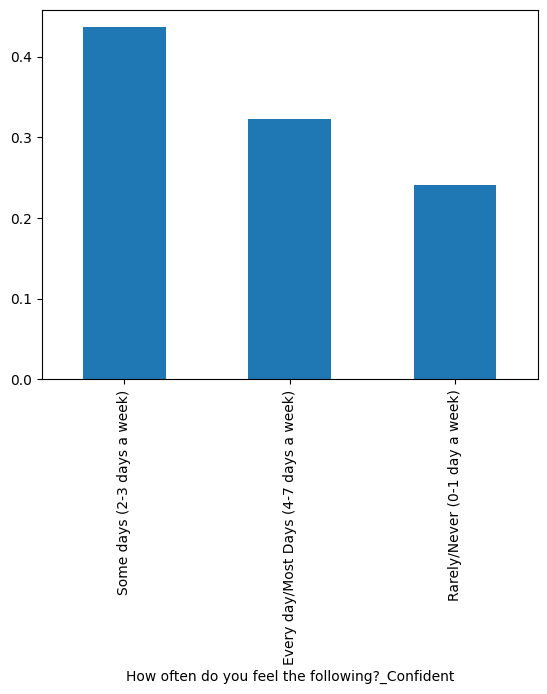

In [164]:
interested_years["How often do you feel the following?_Confident"].value_counts(normalize=True).plot.bar()

<Axes: xlabel='How well do you think you cope with feeling the following?_Stressed or anxious'>

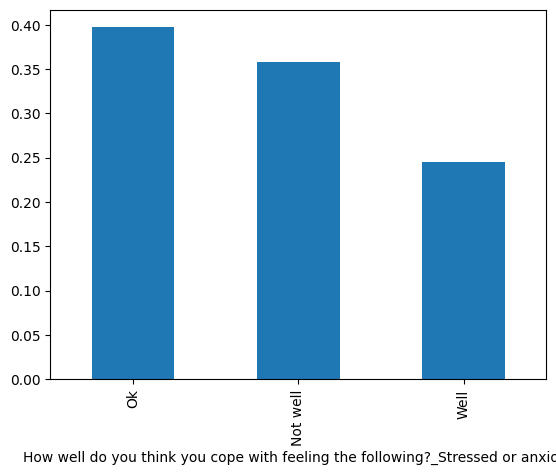

In [165]:
interested_years["How well do you think you cope with feeling the following?_Stressed or anxious"].value_counts(normalize=True).plot.bar()

<Axes: xlabel='How well do you think you cope with feeling the following?_How happy do you feel about the number of good friends you have?'>

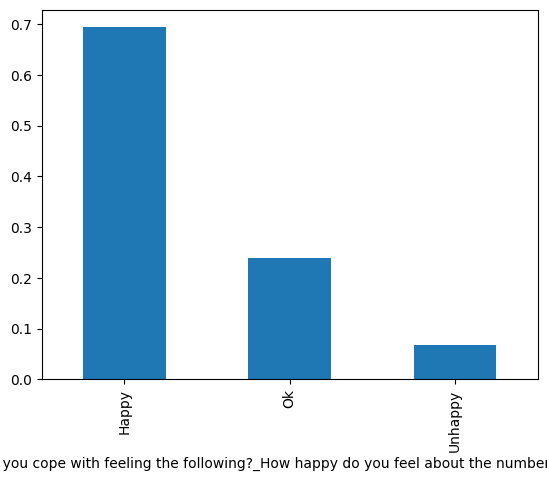

In [167]:
interested_years["How well do you think you cope with feeling the following?_How happy do you feel about the number of good friends you have?"].value_counts(normalize=True).plot.bar()

In [47]:
interested_years["If you have been bullied in or around school/college in the last 12 months, do you think it was because of any of the following?_Are you happy?"].isna().shape

(8117,)

Noticed that Although there is a high number of students that are happy, there is also quite a high number of students that are stressed.
Also noticed that although unhappiness is a not common, there seems to be more students with confidence issues.

In [68]:
students_feeling_happy = interested_years[interested_years["How often do you feel the following?_Happy"] == "Every day/Most Days (4-7 days a week)"]
students_not_coping_well = students_feeling_happy.loc[students_feeling_happy["How well do you think you cope with feeling the following?_Stressed or anxious"] == "Not well"]

In [158]:
students_not_coping_well

,Unnamed: 0,hashed_id,school_classification_list,school_local_authority_filter_classification,questionnaire_login_year_group_name,"As you are filling in this survey today, which of these would you use to describe your gender?",How would you describe your sexual identity?,Which of these describes you?,"Do you have, or do you consider yourself to have, a disability?",Where do you live most of the time?,...,After lockdown..._Have you felt supported by your school?,"After lockdown..._After lockdown, if you needed it, have you been able to get support from school/college to help you with your emotional and mental health?","After lockdown..._During lockdown, my school was good at helping me to keep myself safe","After lockdown..._During lockdown, my school was good at staying in touch with me","After lockdown..._During lockdown, my school was good at helping me with my school work","After lockdown..._After lockdown, are you enjoying being back at school?","After lockdown..._After lockdown, are you getting on well with your school work?","After lockdown..._After lockdown, are you getting on well with your teachers?","After lockdown..._After lockdown, have you felt helped by your teachers?","After lockdown..._After lockdown, if you needed it, have you been able to get help from school with your feelings?"
84,84,'077b',Secondary,National,Year 9,Girl / Female,Heterosexual,White,No,"I live at both of my parents' houses, some of ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,88,'e4f1c',Secondary,National,Year 9,Girl / Female,Heterosexual,White,No,I live with my parent(s)/carer(s),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,126,'d8cf7',Secondary,National,Year 11,Girl / Female,Heterosexual,White,No,"I live at both of my parents' houses, some of ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,128,'789c2',Secondary,National,Year 11,Girl / Female,Heterosexual,White,No,I live with my parent(s)/carer(s),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,134,'94009',Secondary,National,Year 11,Girl / Female,Heterosexual,White,No,I live with my parent(s)/carer(s),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35625,35625,'36122',"Through School, Secondary",Leeds,Year 9,Girl / Female,Heterosexual,White,No,I live with my parent(s)/carer(s),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35629,35629,'6ec72',"Through School, Secondary",Leeds,Year 9,Girl / Female,Heterosexual,Mixed,No,I live with my parent(s)/carer(s),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35654,35654,'82969',"Through School, Secondary",Leeds,Year 9,Boy / Male,Heterosexual,Mixed,Yes,I live with my parent(s)/carer(s),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35661,35661,'4cf49',"Through School, Secondary",Leeds,Year 9,Girl / Female,Bi,White,Yes,"I live at both of my parents' houses, some of ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Gender of students Not coping well with stress(Yr 9 -12)'}, ylabel='count'>

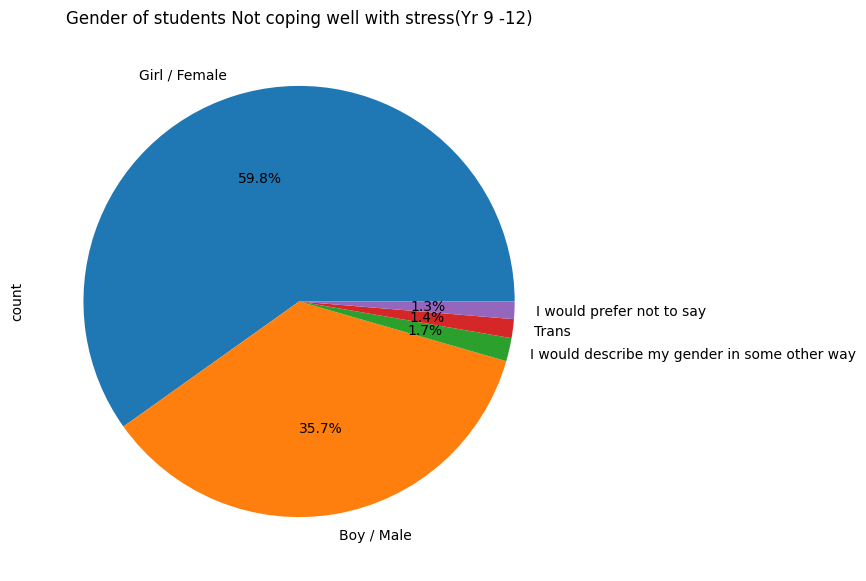

In [168]:
students_not_coping_well["As you are filling in this survey today, which of these would you use to describe your gender?"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(7, 7), title="Gender of students Not coping well with stress(Yr 9 -12)")

<Axes: title={'center': 'Gender of students (Yr 9 - 12)'}, ylabel='count'>

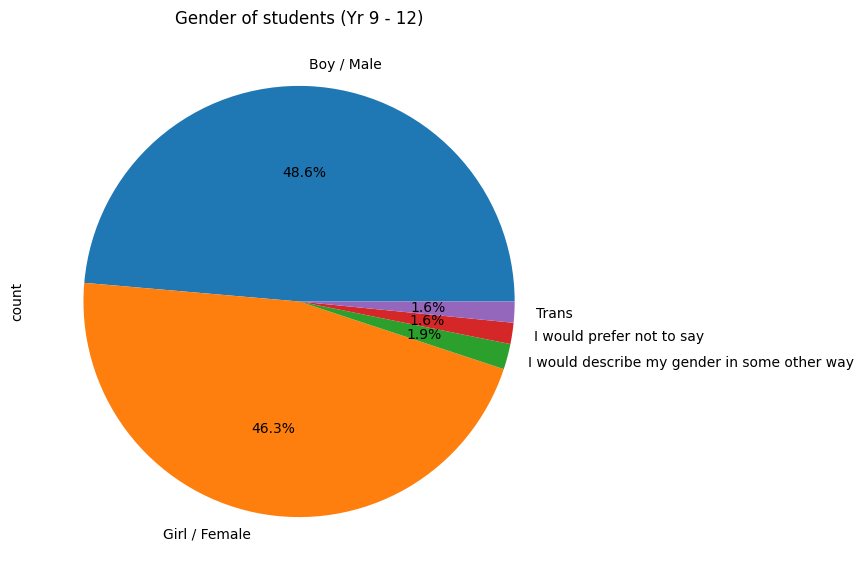

In [108]:
interested_years["As you are filling in this survey today, which of these would you use to describe your gender?"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(7, 7), title="Gender of students (Yr 9 - 12)")

In [74]:
columns = interested_years.columns
X = interested_years.loc[:, columns != "How well do you think you cope with feeling the following?_Stressed or anxious"]

In [79]:
X.iloc[:, 0].unique()

array([    3,     4,     7, ..., 35685, 35688, 35690])

Seems that Alot more females are having issues handling stress.

In [89]:
from tqdm import tqdm

In [118]:
def compare_conditions(columns, condition1, condition2):
    results = {
        "Question": [],
        "Response": [],
        "Percentage": []
    }

    number_of_students_total = interested_years[interested_years[condition1[0]] == condition1[1]].shape[0]

    for column in tqdm(columns):
        responses = interested_years[column]
        unique_responses = responses.unique()

        for unique_response in unique_responses:
            responses_for_column_question = interested_years[interested_years[column] == unique_response]
            responses_matching_condition1 = responses_for_column_question[responses_for_column_question[condition1[0]] == condition1[1]]
            responses_matching_condition2 = responses_matching_condition1[responses_matching_condition1[condition2[0]] == condition2[1]]

            results["Question"].append(column)
            results["Response"].append(unique_response)
            results["Percentage"].append(responses_matching_condition2.shape[0] / number_of_students_total)

    results = pd.DataFrame(results)

    return results
            

In [122]:
results_df_1 = compare_conditions(interested_years.columns[5:], ("How well do you think you cope with feeling the following?_Stressed or anxious", "Not well"), ("As you are filling in this survey today, which of these would you use to describe your gender?", "Boy / Male"))

100%|████████████████████████████████████████████████████████████████████████████████| 834/834 [01:04<00:00, 13.02it/s]


In [162]:
results_df_1.sort_values("Percentage", ascending=False).head(50)

,Question,Response,Percentage
1,"As you are filling in this survey today, which...",Boy / Male,0.290245
801,How well do you think you cope with feeling th...,Not well,0.290245
954,Do you help to look after somebody in your fam...,No,0.268873
699,How often have you used each of the following ...,Yes,0.268183
908,"In the last 12 months, have you ever taken par...",Never,0.264392
966,Do you help to look after somebody in your fam...,No,0.263702
703,How often have you used each of the following ...,No,0.247846
728,If you have felt pressured into having either ...,No,0.247156
950,Why do you feel unsafe at home?_On a normal sc...,No,0.246122
722,If you have felt pressured into having either ...,X,0.244398


In [125]:
results_df_2 = compare_conditions(interested_years.columns[5:], ("How well do you think you cope with feeling the following?_Stressed or anxious", "Not well"), ("As you are filling in this survey today, which of these would you use to describe your gender?", "Girl / Female"))


100%|████████████████████████████████████████████████████████████████████████████████| 834/834 [01:09<00:00, 11.94it/s]


In [157]:
func = lambda x: print(f"{x.Question} | {x.Response} | {x.Percentage}")
results_df_2.sort_values("Percentage").sort_values("Percentage", ascending=False).head(200).apply(func, axis=1)

As you are filling in this survey today, which of these would you use to describe your gender? | Girl / Female | 0.6290934160634264
How well do you think you cope with feeling the following?_Stressed or anxious | Not well | 0.6290934160634264
How often have you used each of the following 'New Psychoactive Substances'?  (These used to be known as legal highs, but are now illegal)_Do you understand what is meant by consent in relation to sexual activity? | Yes | 0.6118579800068942
In the last 12 months, have you ever taken part in any of the following activities (gambled), either online or at a venue?_Roulette | Never | 0.6097897276801103
Do you help to look after somebody in your family because they'?_are your child | No | 0.6059979317476732
In the last 12 months, have you ever taken part in any of the following activities (gambled), either online or at a venue?_Any other betting or gambling activity | Never | 0.5884177869700103
Do you help to look after somebody in your family because 

0       None
801     None
699     None
908     None
954     None
        ... 
866     None
982     None
1067    None
1322    None
338     None
Length: 200, dtype: object

In [169]:
results_df_2.sort_values("percentage", ascending=False)

KeyError: 'percentage'

In [146]:
results_df_2.sort_values("Percentage").sort_values("Percentage", ascending=False).head(40)

,Question,Response,Percentage
0,"As you are filling in this survey today, which...",Girl / Female,0.629093
801,How well do you think you cope with feeling th...,Not well,0.629093
699,How often have you used each of the following ...,Yes,0.611858
908,"In the last 12 months, have you ever taken par...",Never,0.609790
954,Do you help to look after somebody in your fam...,No,0.605998
915,"In the last 12 months, have you ever taken par...",Never,0.588418
966,Do you help to look after somebody in your fam...,No,0.564633
922,"In the last 12 months, have you ever taken par...",Never,0.564288
873,If you have been bullied in or around school/c...,Never,0.559462
728,If you have felt pressured into having either ...,No,0.557394


In [96]:
results_data = {
        "column": [],
        "test_parameter": [],
        "percentage": []
}

for column in tqdm(columns):
    column_data = interested_years[column]
    unique_values = column_data.unique()

    for unique in unique_values:
        compare_count = interested_years[interested_years[column] == unique]
        compare_count = compare_count[compare_count["How well do you think you cope with feeling the following?_Stressed or anxious"] == "Not well"]
        compare_count = compare_count.shape[0]
        results_data["column"].append(column)
        results_data["test_parameter"].append(unique)
        results_data["percentage"].append(compare_count / interested_years.shape[0])

results_dataframe = pd.DataFrame(results_data)

100%|████████████████████████████████████████████████████████████████████████████████| 839/839 [00:47<00:00, 17.52it/s]


In [103]:
results_dataframe[results_dataframe["percentage"] > .1].sort_values("percentage", ascending=False).head(30)

,column,test_parameter,percentage
17046,How well do you think you cope with feeling th...,Not well,0.357398
16944,How often have you used each of the following ...,Yes,0.338672
17199,Do you help to look after somebody in your fam...,No,0.338056
17153,"In the last 12 months, have you ever taken par...",Never,0.335099
17211,Do you help to look after somebody in your fam...,No,0.321178
17160,"In the last 12 months, have you ever taken par...",Never,0.318467
16234,school_classification_list,Secondary,0.316373
16973,If you have felt pressured into having either ...,No,0.309351
17167,"In the last 12 months, have you ever taken par...",Never,0.308365
17174,"In the last 12 months, have you ever taken par...",Never,0.302944
